In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

### Shot Map using iterative solution

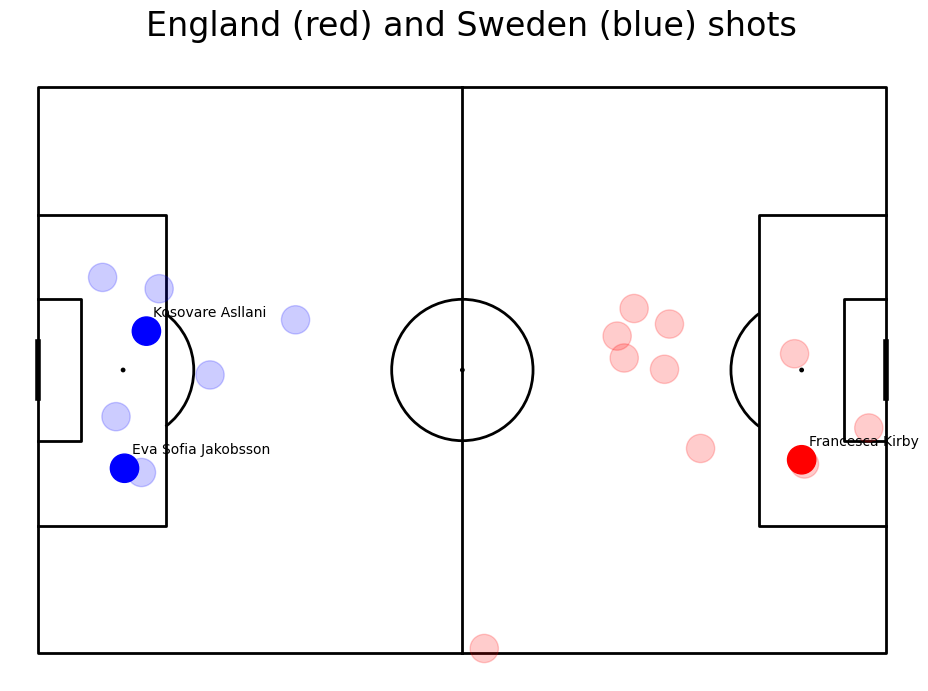

In [3]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

### Shot Map using mplsoccer's Pitch class

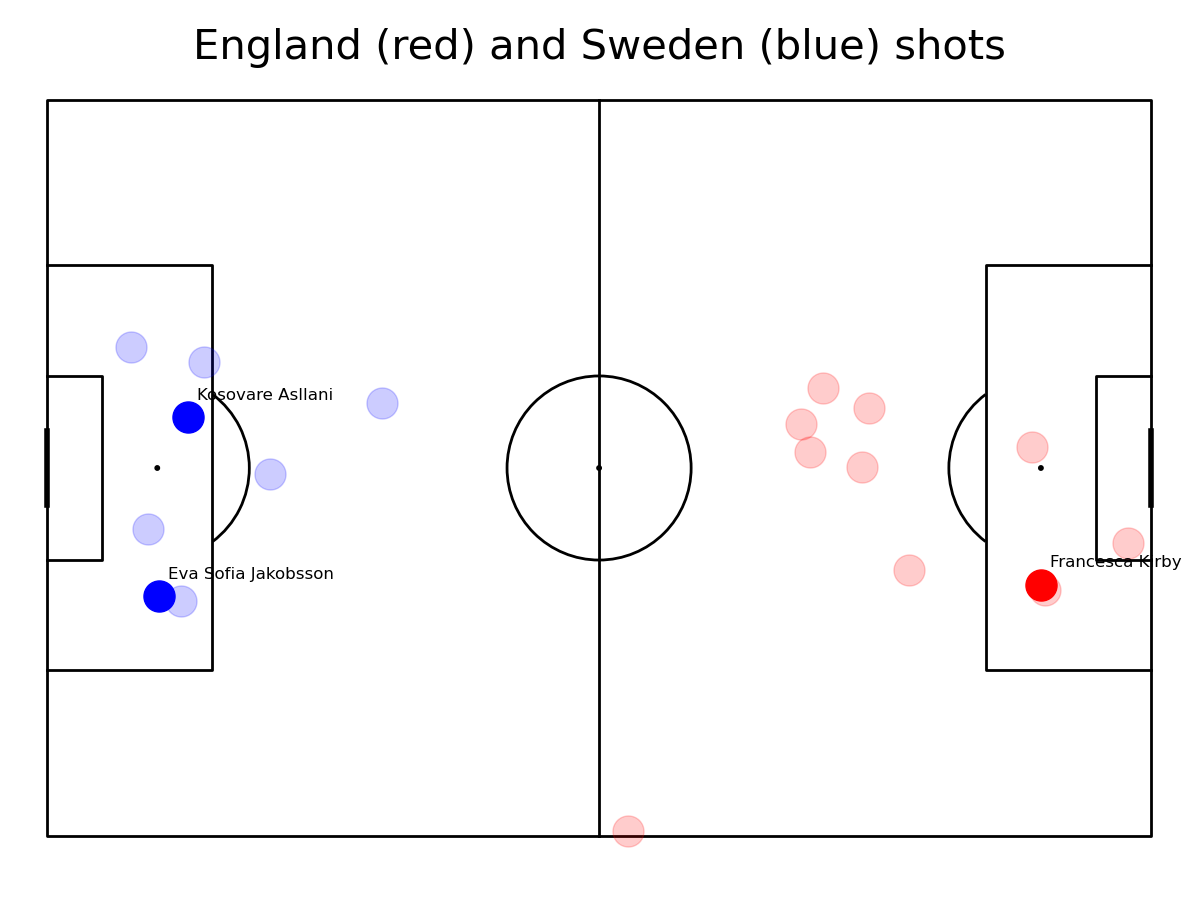

In [4]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

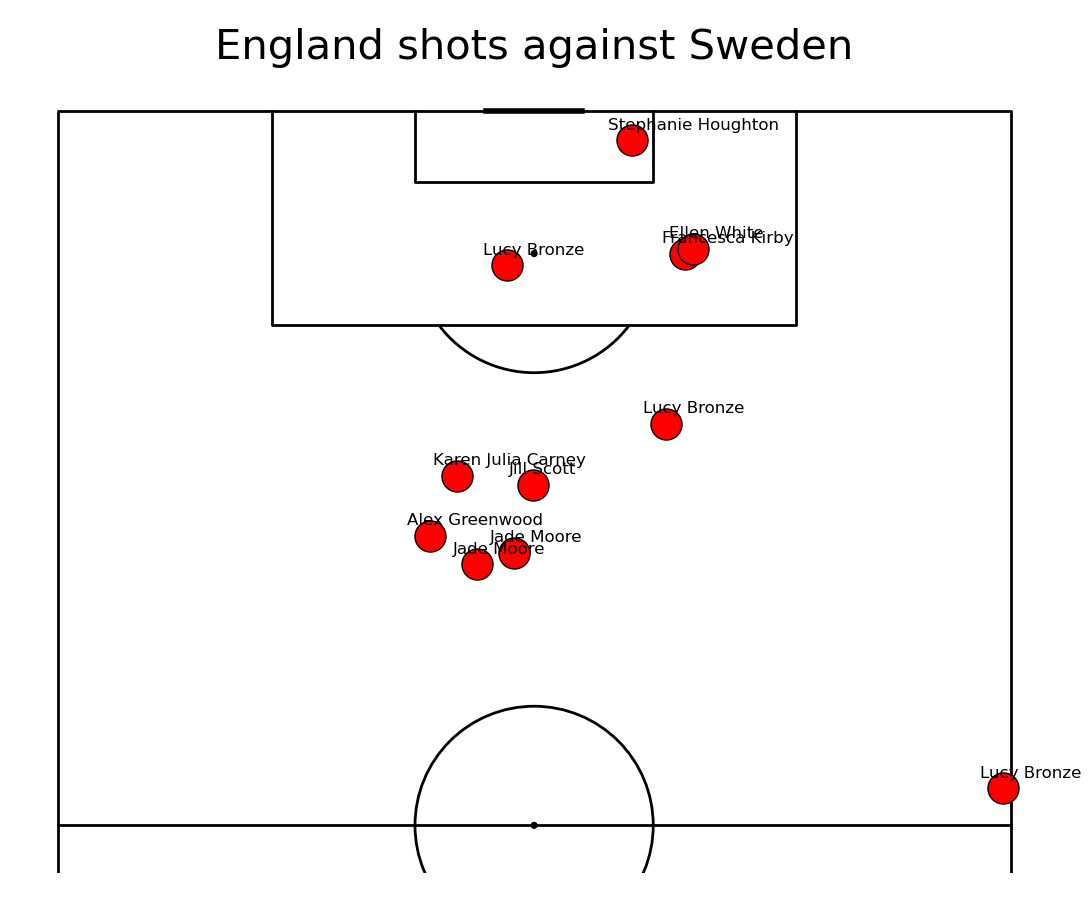

In [7]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
#for England
for i, row in df_england.iterrows():
    pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

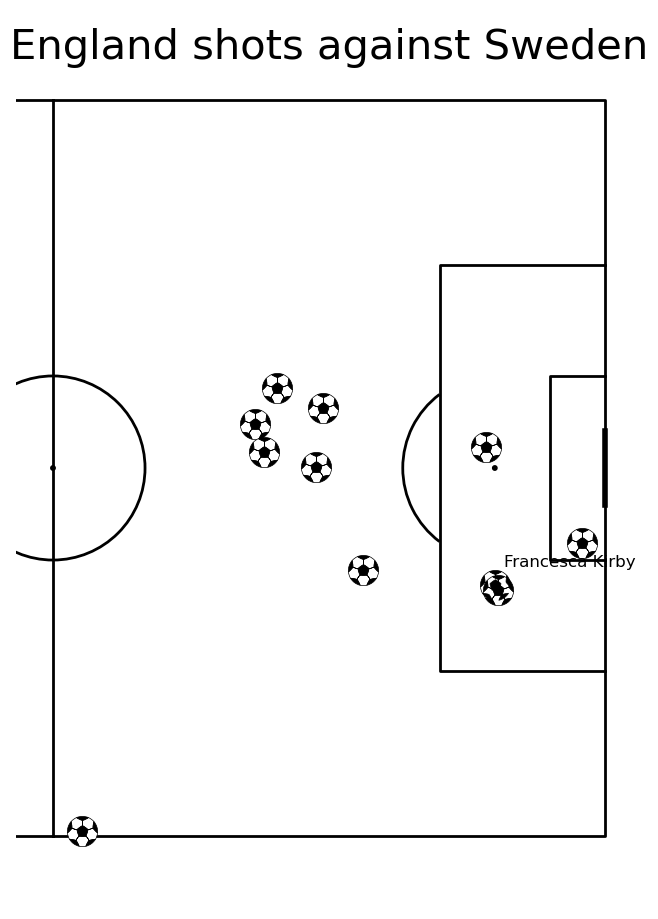

In [13]:
pitch = Pitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, ax=ax['pitch'], edgecolors="black",marker="football" )
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
        pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

In [14]:
df

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.16873,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,55691335-31db-4005-8e89-bd0dc339042c,3287,2,00:48:23.093000,93,23,197,0.00000,69301,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,7c1e709c-f5ca-43fc-a504-bde542a2b8ee,3288,2,00:49:19.754000,94,19,198,2.82260,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3288,78fe8fb7-7319-4f39-9e40-ecf9e268a86d,3289,2,00:49:22.576000,94,22,198,NaN,69301,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,145a6b3b-0e1b-4511-a054-1100fab81bab,3290,2,00:49:24.887000,94,24,198,0.00000,69301,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Questions
### 1. Create a dataframe of passes which contains all the passes in the match


In [20]:
df_pass = df.loc[df['type_name'] == 'Pass'].set_index('id')

In [21]:
df_pass

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164e4ca3-2e57-4df1-869a-bfeeeb815854,3272,2,00:48:09.673000,93,9,196,0.988864,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
da0f15bd-0e0e-44a0-94db-f08bcf5ccff2,3275,2,00:48:11.298000,93,11,196,1.533881,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97e4dc37-a921-483f-91f5-6d17def2b2fc,3278,2,00:48:13.680000,93,13,196,1.148229,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Plot the start point of every Sweden pass. Attacking left to right.



In [23]:
df_sweden_pass = df.team_name == team2
df_sweden_pass = df.loc[df_sweden_pass]

df_sweden_pass

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00,0,0,1,0.000000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00,0,0,1,0.000000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6827fdbf-4ccd-4fa8-b22a-3369e74b0340,1581,1,00:00:00.628000,0,0,89,NaN,69301,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,e85776b5-4480-4548-b4c3-3f1789c7dd59,8,1,00:00:04.675000,0,4,2,0.362897,69301,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,39c016bc-47cc-4511-9833-d64c68dc05a1,16,1,00:00:10.928000,0,10,2,0.338841,69301,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,95410bcb-fca0-4712-83b8-9d63b389807b,3285,2,00:48:22.494000,93,22,197,0.598600,69301,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3286,55691335-31db-4005-8e89-bd0dc339042c,3287,2,00:48:23.093000,93,23,197,0.000000,69301,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,7c1e709c-f5ca-43fc-a504-bde542a2b8ee,3288,2,00:49:19.754000,94,19,198,2.822600,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3288,78fe8fb7-7319-4f39-9e40-ecf9e268a86d,3289,2,00:49:22.576000,94,22,198,NaN,69301,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


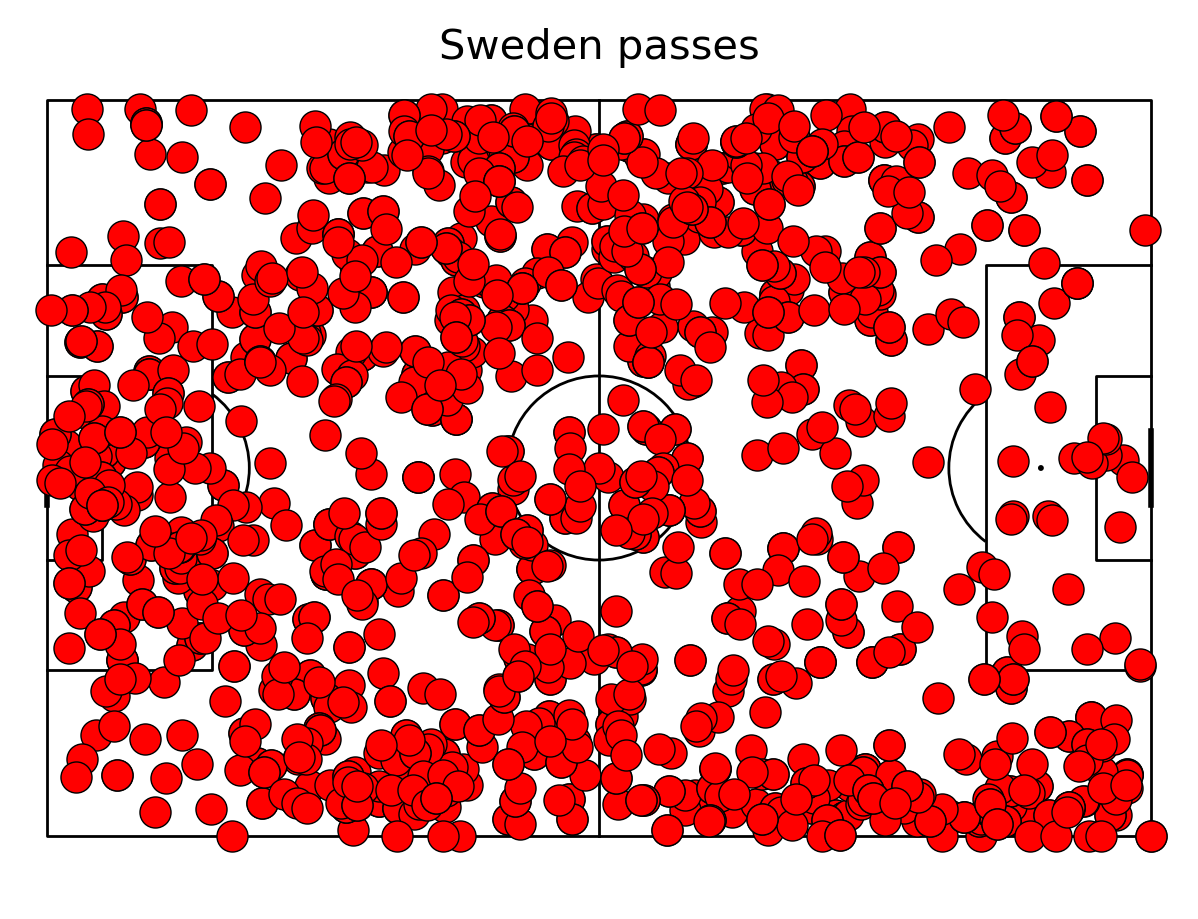

In [27]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_sweden_pass.x, df_sweden_pass.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")

fig.suptitle("Sweden passes", fontsize = 30)
plt.show()

### Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

In [30]:
df_lineup = parser.lineup(69301)
caroline_id = df_lineup[df_lineup['player_name'] == "Sara Caroline Seger"]["player_id"]

In [45]:
df_lineup[df_lineup['player_name'] == "wahi"]

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
6,10224,Sara Caroline Seger,Sara Caroline Seger,17,69301,858,Sweden Women's,220,Sweden


In [36]:
caroline_id 

6    10224
Name: player_id, dtype: int64

In [42]:
df_caroline_pass = df_sweden_pass[df_sweden_pass['player_id'] == float(caroline_id)]

In [43]:
df_caroline_pass

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
16,39c016bc-47cc-4511-9833-d64c68dc05a1,16,1,00:00:10.928000,0,10,2,0.338841,69301,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,938490b0-1873-4002-b8a8-6a45ddd65904,212,1,00:05:46.755000,5,46,13,0.000000,69301,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,0b397427-f3e0-4ee6-8caf-44b8a930409d,213,1,00:05:46.755000,5,46,13,1.490200,69301,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,20327faa-37ea-49e2-9a93-c5ef9ff3e34c,214,1,00:05:48.245000,5,48,13,1.169700,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,dbee8582-011f-41fd-99cc-2ed35cf241ab,225,1,00:05:56.563000,5,56,13,0.628399,69301,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,59e776f5-c385-40c5-8eb8-b5127107d041,2768,2,00:32:18.962000,77,18,160,NaN,69301,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2768,836f79bc-515b-410c-a2c4-50ef0abd2007,2769,2,00:32:18.962000,77,18,160,0.929665,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2971,79628bbe-2629-4d66-9ab0-d0fdeea16894,2972,2,00:38:11.524000,83,11,174,0.000000,69301,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2976,1c2f888d-2559-4ebe-816e-7ba12d92daaa,2977,2,00:38:32.228000,83,32,175,0.000000,69301,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


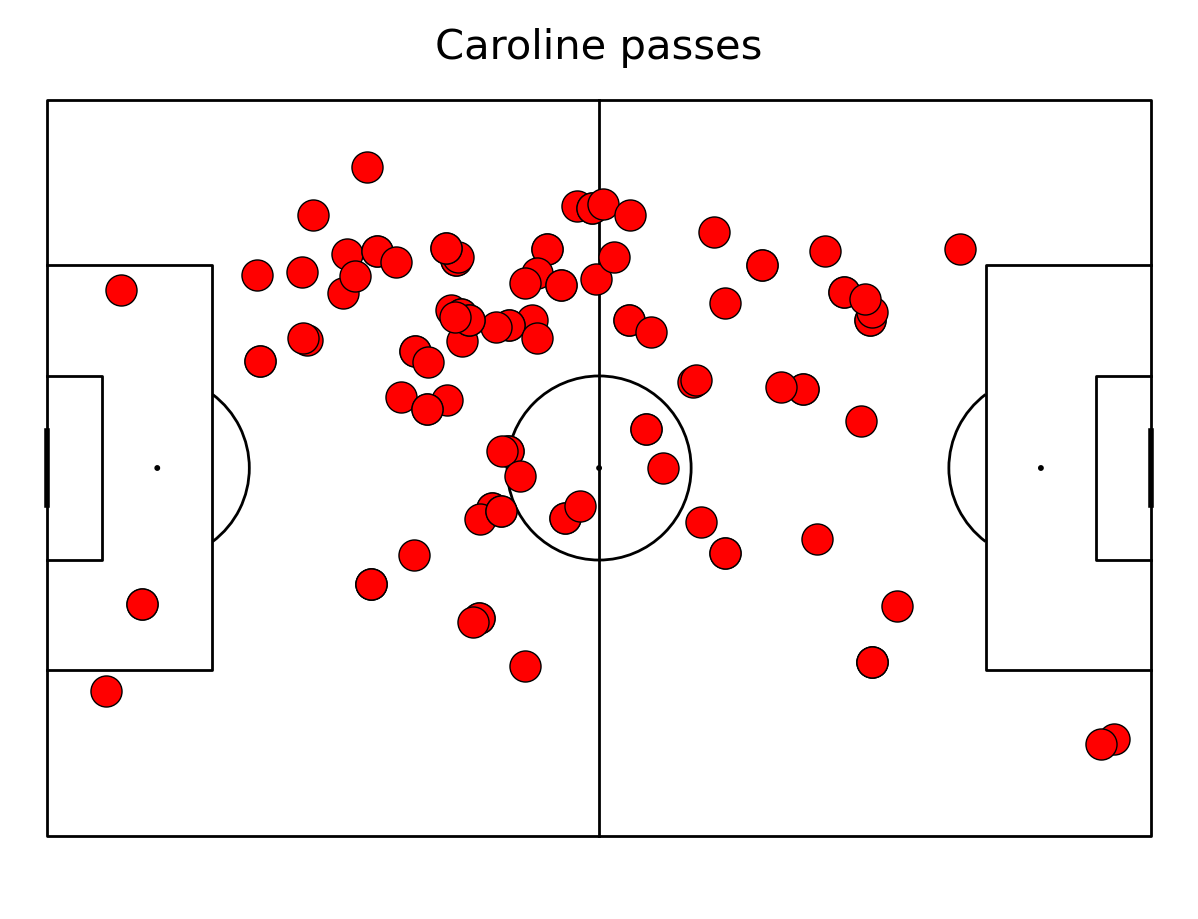

In [44]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_caroline_pass.x, df_caroline_pass.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")

fig.suptitle("Caroline passes", fontsize = 30)
plt.show()

### 4. Plot arrows to show where the passes went to.



/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_binned_statistic.py:665: RuntimeWarning: Mean of empty slice
  result[vv, i] = stat_func(np.array(bin_map[i]))


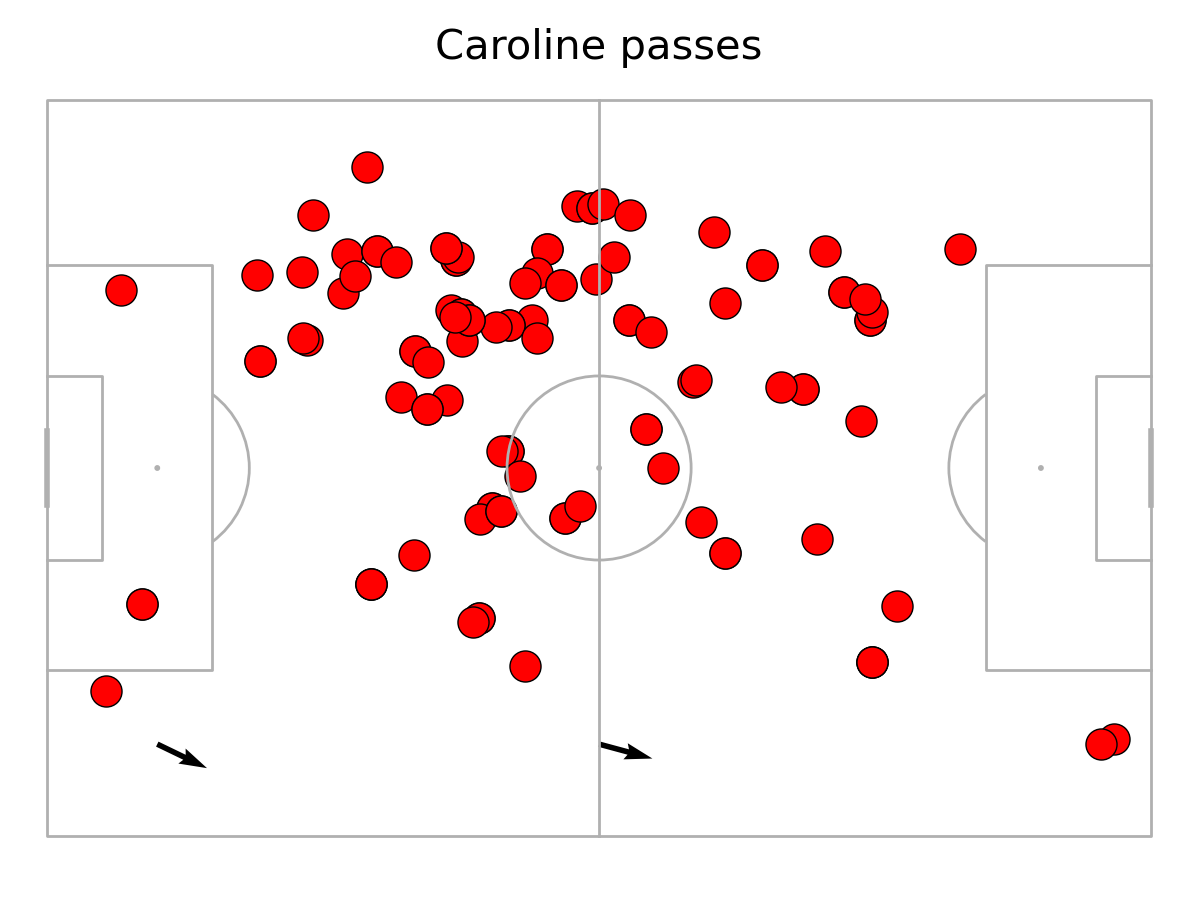

In [51]:
pitch = Pitch(line_zorder=2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(df_caroline_pass.x, df_caroline_pass.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")

pitch.flow(df_caroline_pass.x, df_caroline_pass.y, df_caroline_pass.end_x, df_caroline_pass.end_y, 
           color='black', arrow_type='same',
          arrow_length=6, ax=ax['pitch'])

fig.suptitle("Caroline passes", fontsize = 30)
plt.show()
